In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [3]:
df1 = pd.read_csv("gzbf.csv")
df1.head()

,location,sqft_area,price,bathrooms,rooms
0,"Railway Station Rd near Classic hotel,bazaria ...",900,70.0,3 Baths,2 BHK
1,Vasundhara sector 13,850,47.0,2 Baths,2 BHK
2,Sahibabad,650,49.0,2 Baths,2 BHK
3,Ghukna,600,15.0,2 Baths,2 BHK
4,Nehru Nagar,3000,170.0,4 Baths,4 BHK


In [4]:
df1['rooms'].unique()

array(['2 BHK', '4 BHK', '3 BHK', '1 BHK', '5 BHK', '6 BHK', '7 BHK',
       '8 BHK', '9 BHK', '10 BHK', '12 BHK', '80 BHK'], dtype=object)

In [5]:
df1['bhk']=df1['rooms'].apply(lambda x: int(x.split(' ')[0]))

In [6]:
df1.head()

,location,sqft_area,price,bathrooms,rooms,bhk
0,"Railway Station Rd near Classic hotel,bazaria ...",900,70.0,3 Baths,2 BHK,2
1,Vasundhara sector 13,850,47.0,2 Baths,2 BHK,2
2,Sahibabad,650,49.0,2 Baths,2 BHK,2
3,Ghukna,600,15.0,2 Baths,2 BHK,2
4,Nehru Nagar,3000,170.0,4 Baths,4 BHK,4


In [7]:
df1[df1.bhk>20]

,location,sqft_area,price,bathrooms,rooms,bhk
910,Vasundhara sector 3,975,42.90,2 Baths,80 BHK,80
918,Vasundhara sector 1,1350,47.49,2 Baths,80 BHK,80


In [8]:
df1['bhk'].unique()

array([ 2,  4,  3,  1,  5,  6,  7,  8,  9, 10, 12, 80], dtype=int64)

In [9]:
df1['bath']=df1['bathrooms'].apply(lambda x: int(x.split(' ')[0]))

In [10]:
df1.head()

,location,sqft_area,price,bathrooms,rooms,bhk,bath
0,"Railway Station Rd near Classic hotel,bazaria ...",900,70.0,3 Baths,2 BHK,2,3
1,Vasundhara sector 13,850,47.0,2 Baths,2 BHK,2,2
2,Sahibabad,650,49.0,2 Baths,2 BHK,2,2
3,Ghukna,600,15.0,2 Baths,2 BHK,2,2
4,Nehru Nagar,3000,170.0,4 Baths,4 BHK,4,4


In [11]:
df2 = df1.astype({'sqft_area':'int'})

In [12]:
df2 = df1.copy()
df2['ppsqft']=df2['price']*100000/df2['sqft_area']
df2.head()

,location,sqft_area,price,bathrooms,rooms,bhk,bath,ppsqft
0,"Railway Station Rd near Classic hotel,bazaria ...",900,70.0,3 Baths,2 BHK,2,3,7777.777778
1,Vasundhara sector 13,850,47.0,2 Baths,2 BHK,2,2,5529.411765
2,Sahibabad,650,49.0,2 Baths,2 BHK,2,2,7538.461538
3,Ghukna,600,15.0,2 Baths,2 BHK,2,2,2500.000000
4,Nehru Nagar,3000,170.0,4 Baths,4 BHK,4,4,5666.666667


In [13]:
df2.columns

Index(['location ', 'sqft_area', 'price', 'bathrooms', 'rooms', 'bhk', 'bath',
       'ppsqft'],
      dtype='object')

In [14]:
df2 = df2.rename(columns={'location ':'location'})

In [15]:
len(df2.location.unique())

260

In [16]:
df2.location=df2.location.apply(lambda x: x.strip())

location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending = False)

location_stats

location
Indirapuram                                                                    99
Niti khand                                                                     94
Indirapuram, Indirapuram, Ghaziabad, Ghaziabad District, Ghaziabad District    80
Vasundhara, Vasundhara, Ghaziabad, Ghaziabad District, Ghaziabad District      77
Vasundhara                                                                     76
                                                                               ..
PARISHA HOMES, Lal Kuan,                                                        1
Orange County, Orange County, Indirapuram                                       1
Null,Lal kuan Ghaziabad,Mansrowar Park,ghaziabad                                1
Nr. Allahabad Bank,Sector-1,ghaziabad                                           1
3 BHKFlat for sale, Airport Road                                                1
Name: location, Length: 223, dtype: int64

In [17]:
len(location_stats[location_stats<2])

83

In [18]:
loc_less_than_2= location_stats[location_stats<2]
loc_less_than_2

location
Chapprola, Lal Kuan, Lal Kuan, Ghaziabad, Ghaziabad District, Ghaziabad District                                         1
Vaishali, Ghaziabad - Gated Community                                                                                    1
Vaishali, Ghaziabad, Ghaziabad District, Uttar Pradesh                                                                   1
Bulandshahr Road Industrial Area, Bulandshahr Road Industrial Area, Ghaziabad, Ghaziabad District, Ghaziabad District    1
Vaishali sector 2                                                                                                        1
                                                                                                                        ..
PARISHA HOMES, Lal Kuan,                                                                                                 1
Orange County, Orange County, Indirapuram                                                                                1
Null,La

In [19]:
df2.location = df2.location.apply(lambda x: 'other' if x in loc_less_than_2 else x)
len(df2.location.unique())

141

In [20]:
df2.head(10)

,location,sqft_area,price,bathrooms,rooms,bhk,bath,ppsqft
0,other,900,70.0,3 Baths,2 BHK,2,3,7777.777778
1,Vasundhara sector 13,850,47.0,2 Baths,2 BHK,2,2,5529.411765
2,Sahibabad,650,49.0,2 Baths,2 BHK,2,2,7538.461538
3,Ghukna,600,15.0,2 Baths,2 BHK,2,2,2500.000000
4,Nehru Nagar,3000,170.0,4 Baths,4 BHK,4,4,5666.666667
5,Shakti khand 4,1200,57.0,2 Baths,3 BHK,3,2,4750.000000
6,other,900,50.0,3 Baths,3 BHK,3,3,5555.555556
7,Mohan Nagar,1075,52.0,2 Baths,3 BHK,3,2,4837.209302
8,Sahibabad,1640,125.0,4 Baths,4 BHK,4,4,7621.951220
9,Lal kuan,369,14.0,1 Bath,1 BHK,1,1,3794.037940


In [21]:
df2[df2.sqft_area/df2.bhk<300].head()

,location,sqft_area,price,bathrooms,rooms,bhk,bath,ppsqft
11,Lal kuan,405,25.0,1 Bath,2 BHK,2,1,6172.839506
12,Lal kuan,645,25.5,2 Baths,3 BHK,3,2,3953.488372
19,other,432,17.0,2 Baths,2 BHK,2,2,3935.185185
30,NH 24,527,45.0,3 Baths,2 BHK,2,3,8538.899431
77,Nyay khand,277,13.5,1 bath,1 BHK,1,1,4873.646209


In [22]:
df2.shape

(1634, 8)

In [23]:
df3 = df2[~(df2.sqft_area/df2.bhk<200)]
df3.shape

(1550, 8)

In [24]:
df3.ppsqft.describe()

count      1550.000000
mean       5432.601741
std        7874.088248
min         347.222222
25%        3800.871632
50%        4736.842105
75%        6000.000000
max      300190.476190
Name: ppsqft, dtype: float64

In [25]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.ppsqft)
        st = np.std(subdf.ppsqft)
        reduced_df = subdf[(subdf.ppsqft>(m-st)) & (subdf.ppsqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df4 = remove_pps_outliers(df3)
df4.shape

(1078, 8)

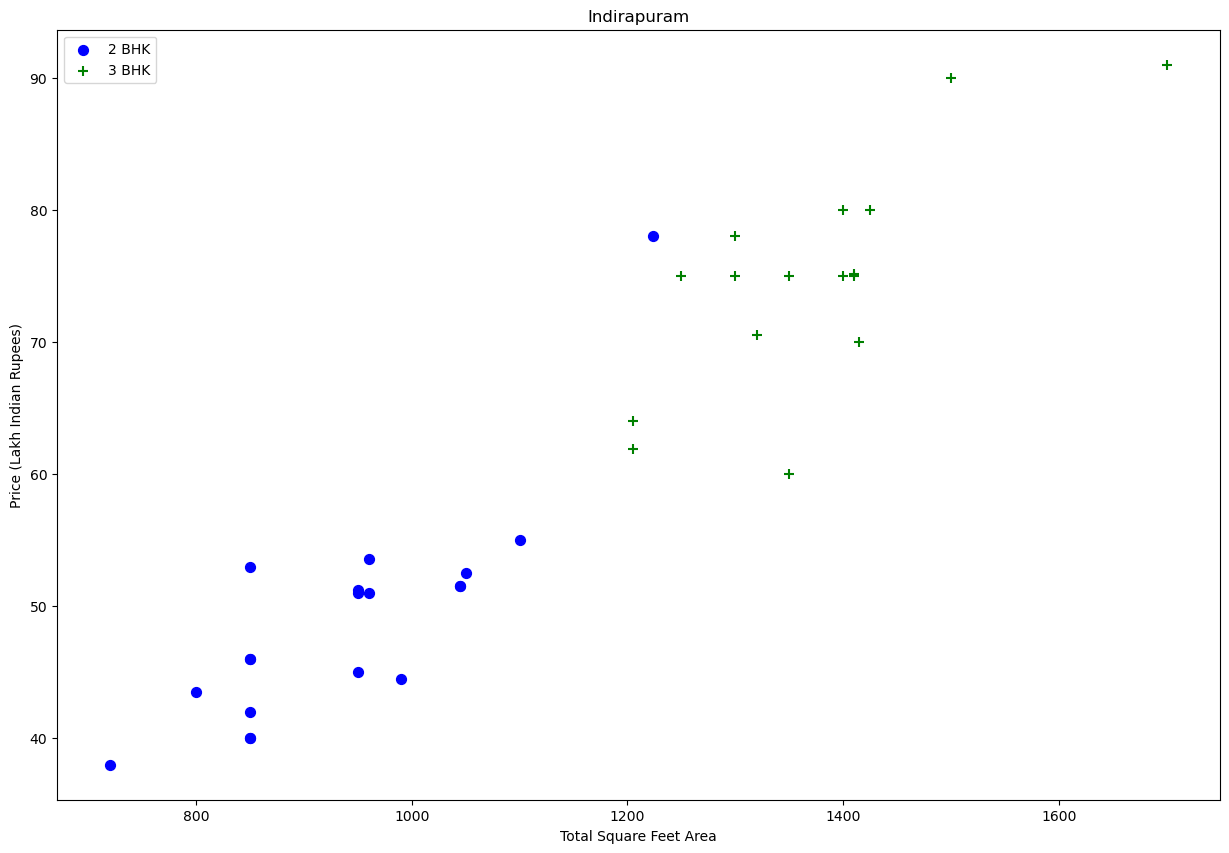

In [26]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.sqft_area,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.sqft_area,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df4,"Indirapuram")

In [27]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.ppsqft),
                'std': np.std(bhk_df.ppsqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.ppsqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df4)
# df8 = df7.copy()
df5.shape

(969, 8)

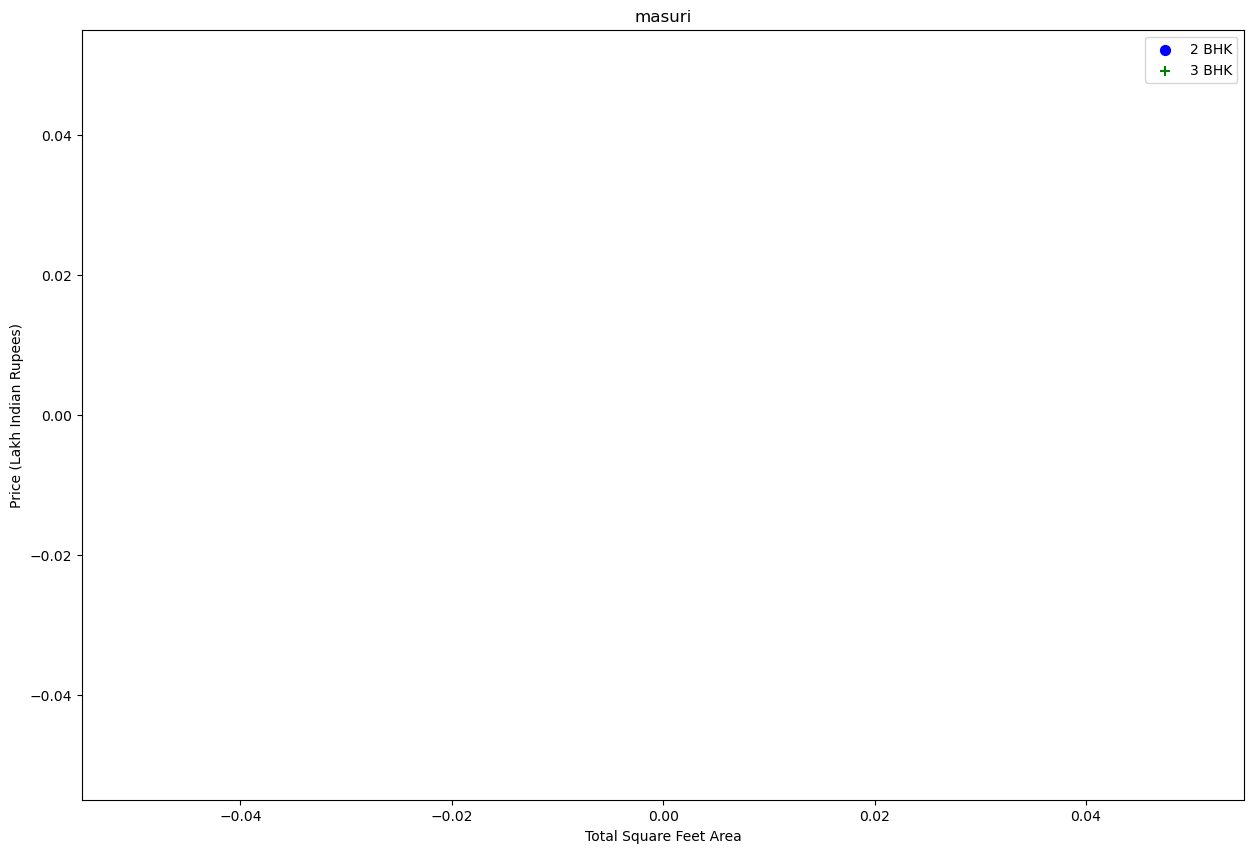

In [28]:
plot_scatter_chart(df5,"masuri")

Text(0, 0.5, 'Count')

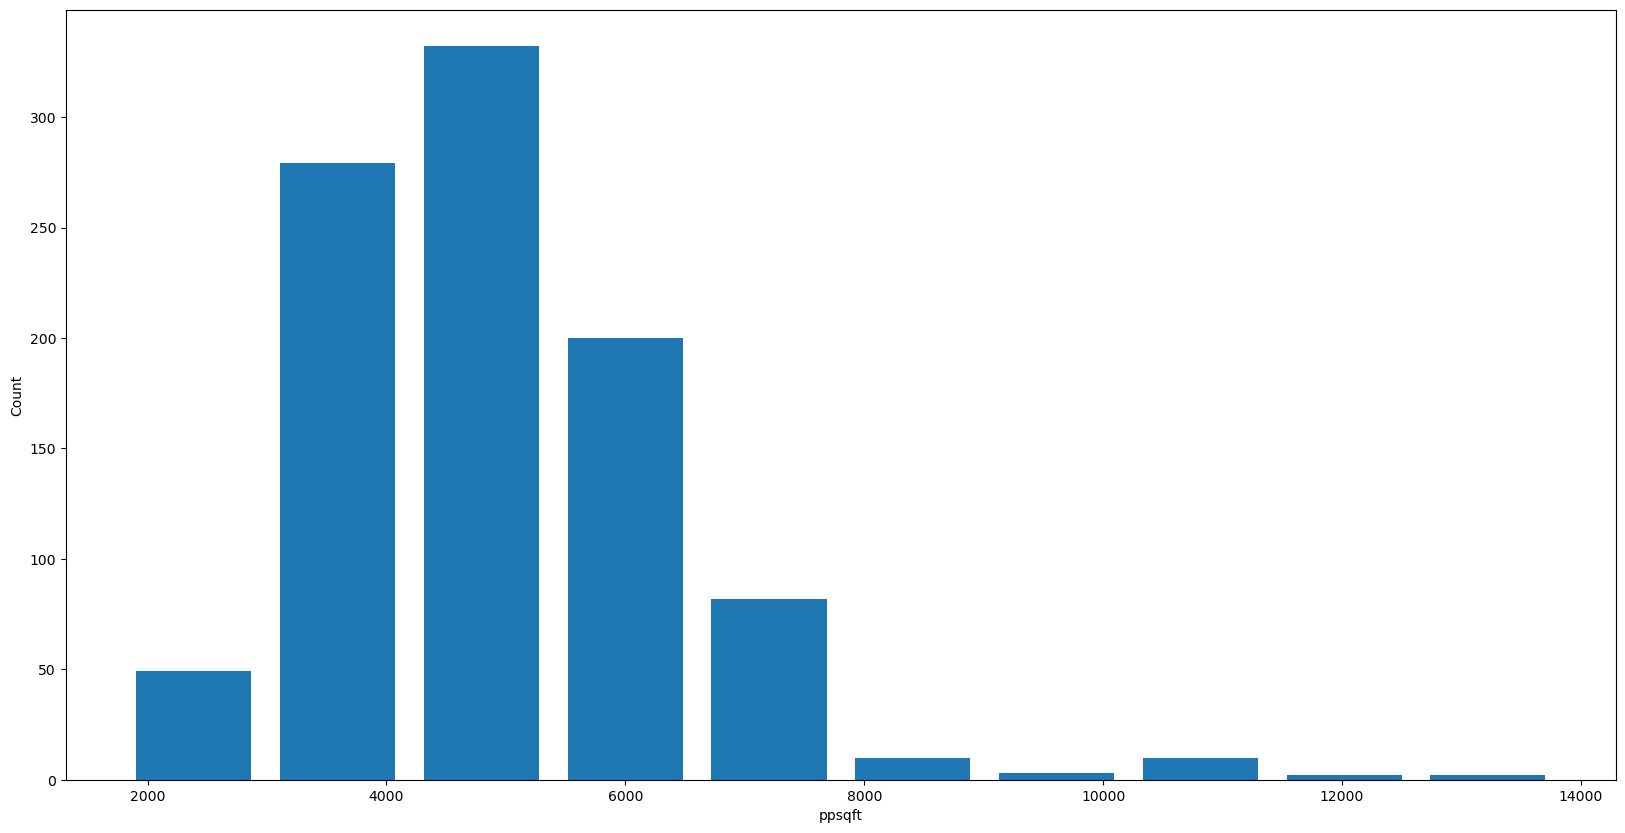

In [29]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df5.ppsqft,rwidth=0.8)
plt.xlabel("ppsqft")
plt.ylabel("Count")

In [30]:
df5.bathrooms.unique()

array(['3 Baths', '2 bath', '4 bath', '1 bath', '3 bath', '2 Baths',
       '1 Bath', '5 bath', '8 bath', '4 Baths', '6 Baths', '5 Baths'],
      dtype=object)

In [31]:
df5[df5.bath>6]

,location,sqft_area,price,bathrooms,rooms,bhk,bath,ppsqft
77,Chiranjeev Vihar,3800,250.0,8 bath,7 BHK,7,8,6578.947368
119,Govindpuram,3150,100.0,8 bath,7 BHK,7,8,3174.603175
179,Indirapuram,3622,210.0,8 bath,9 BHK,9,8,5797.901712
180,Indirapuram,3622,210.0,8 bath,9 BHK,9,8,5797.901712
288,Khora,1755,65.0,8 bath,8 BHK,8,8,3703.703704
289,Khora,1755,65.0,8 bath,8 BHK,8,8,3703.703704
337,Lohia Nagar,6300,243.0,8 bath,8 BHK,8,8,3857.142857
338,Lohia Nagar,6300,243.0,8 bath,8 BHK,8,8,3857.142857
344,Madhopura,2600,110.0,8 bath,9 BHK,9,8,4230.769231
345,Madhopura,2600,110.0,8 bath,9 BHK,9,8,4230.769231


Text(0, 0.5, 'Count')

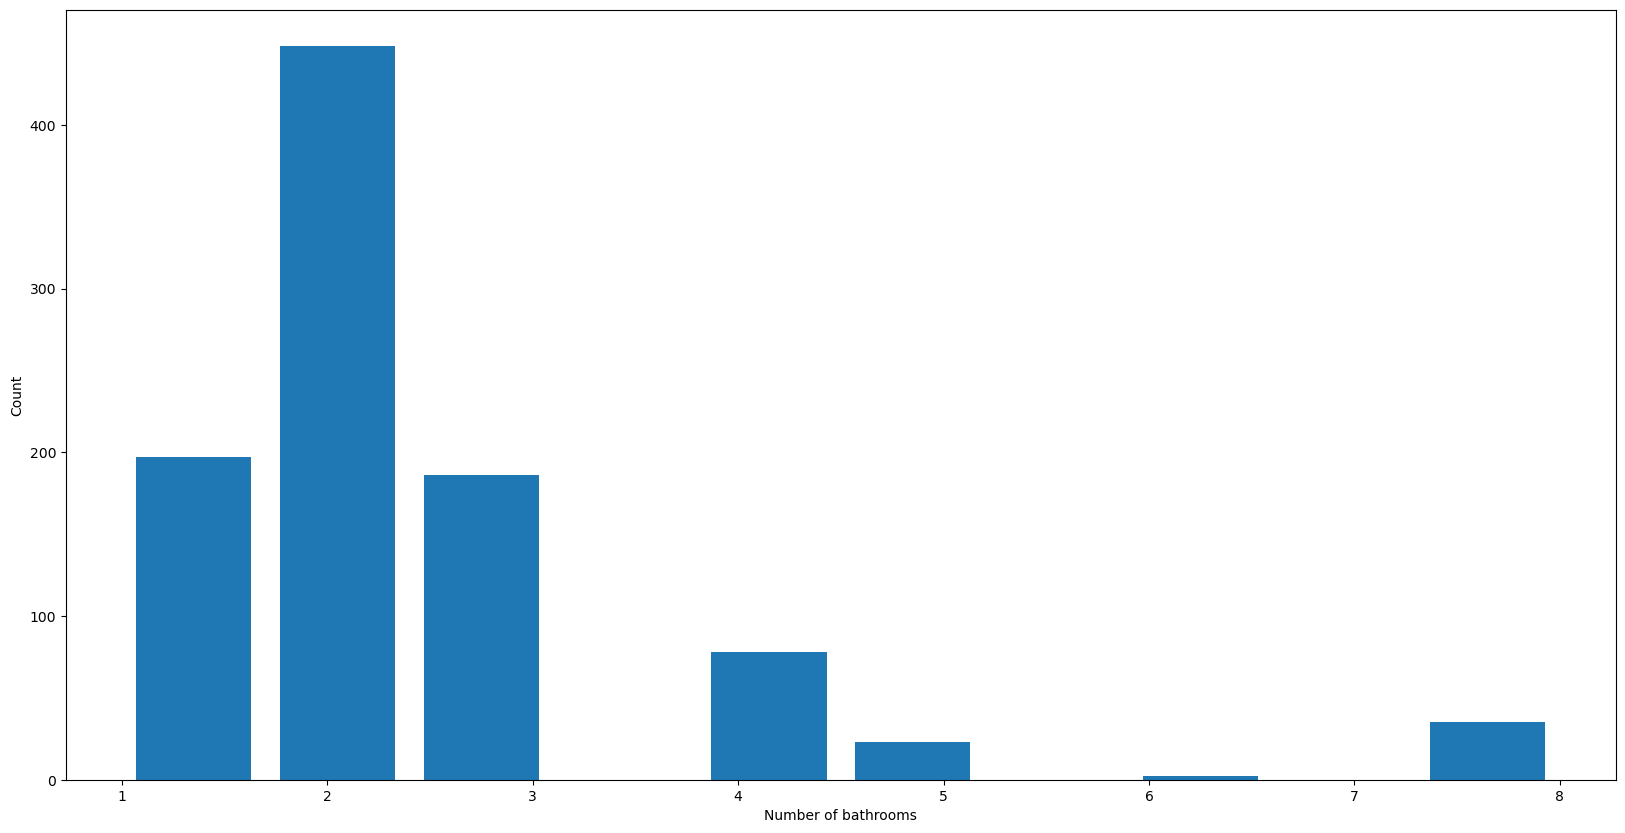

In [32]:
plt.hist(df5.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [33]:
df6 = df5.drop(['rooms','ppsqft' , 'bathrooms'],axis='columns')
df6.head()

,location,sqft_area,price,bhk,bath
0,"ATS Advantage, Indirapuram",5400,560.0,5,3
1,"ATS Advantage, Indirapuram",1365,120.0,2,2
2,"ATS Advantage, Indirapuram",5400,560.0,5,4
3,"ATS Advantage, Indirapuram",5400,560.0,5,4
4,Ahinsa Khand-2,956,64.7,3,3


In [34]:
dummies = pd.get_dummies(df6.location)
dummies.head(3)

,"ATS Advantage, Indirapuram",Ahinsa Khand-2,Ahinsa khand,Ankur vihar,"Antriksh Greens, Indirapuram",Bamheta,Bhopura,"Chhapraula, Chhapraula, Ghaziabad, Gautam Buddh Nagar District, Gautam Buddh Nagar District","Chipiyana Buzurg, Chipiyana Buzurg, Ghaziabad, Gautam Buddh Nagar District, Gautam Buddh Nagar District","Chipiyana, Chipiyana Buzurg, Chipiyana Buzurg, Ghaziabad, Gautam Buddh Nagar District, Gautam Buddh Nagar District",...,"Vasundhara, Ghaziabad, Ghaziabad District, Uttar Pradesh","Vasundhara, Vasundhara, Ghaziabad, Ghaziabad District, Ghaziabad District",Wave City,indrapuram,other,pandav nagar,vaishali sector 5,vasundhara,vasundhara sector 3,vijay nagar
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df7 = pd.concat([df6,dummies.drop('other',axis='columns')],axis='columns')
df7.head()

,location,sqft_area,price,bhk,bath,"ATS Advantage, Indirapuram",Ahinsa Khand-2,Ahinsa khand,Ankur vihar,"Antriksh Greens, Indirapuram",...,"Vasundhara, Ghaziabad - Furnished","Vasundhara, Ghaziabad, Ghaziabad District, Uttar Pradesh","Vasundhara, Vasundhara, Ghaziabad, Ghaziabad District, Ghaziabad District",Wave City,indrapuram,pandav nagar,vaishali sector 5,vasundhara,vasundhara sector 3,vijay nagar
0,"ATS Advantage, Indirapuram",5400,560.0,5,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"ATS Advantage, Indirapuram",1365,120.0,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"ATS Advantage, Indirapuram",5400,560.0,5,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"ATS Advantage, Indirapuram",5400,560.0,5,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ahinsa Khand-2,956,64.7,3,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df8 = df7.drop('location',axis='columns')
df8.head(2)

,sqft_area,price,bhk,bath,"ATS Advantage, Indirapuram",Ahinsa Khand-2,Ahinsa khand,Ankur vihar,"Antriksh Greens, Indirapuram",Bamheta,...,"Vasundhara, Ghaziabad - Furnished","Vasundhara, Ghaziabad, Ghaziabad District, Uttar Pradesh","Vasundhara, Vasundhara, Ghaziabad, Ghaziabad District, Ghaziabad District",Wave City,indrapuram,pandav nagar,vaishali sector 5,vasundhara,vasundhara sector 3,vijay nagar
0,5400,560.0,5,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1365,120.0,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df8.shape

(969, 123)

In [38]:
X = df8.drop(['price'],axis='columns')
X.head(3)

,sqft_area,bhk,bath,"ATS Advantage, Indirapuram",Ahinsa Khand-2,Ahinsa khand,Ankur vihar,"Antriksh Greens, Indirapuram",Bamheta,Bhopura,...,"Vasundhara, Ghaziabad - Furnished","Vasundhara, Ghaziabad, Ghaziabad District, Uttar Pradesh","Vasundhara, Vasundhara, Ghaziabad, Ghaziabad District, Ghaziabad District",Wave City,indrapuram,pandav nagar,vaishali sector 5,vasundhara,vasundhara sector 3,vijay nagar
0,5400,5,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1365,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5400,5,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
y = df8.price
y.head()

0    560.0
1    120.0
2    560.0
3    560.0
4     64.7
Name: price, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [58]:
#from sklearn.tree import DecisionTreeRegressor 
#lr_clf = DecisionTreeRegressor()
#lr_clf.fit(X_train,y_train)
#lr_clf.score(X_test,y_test)
from sklearn.linear_model import LinearRegression
#lr_clf = LinearRegression()
#lr_clf.fit(X_train,y_train)
#lr_clf.score(X_test,y_test)
#from sklearn.linear_model import Lasso
#lr_clf = Lasso()
#lr_clf.fit(X_train,y_train)
#lr_clf.score(X_test,y_test)
#from sklearn.linear_model import BayesianRidge
#lr_clf = BayesianRidge()
#lr_clf.fit(X_train,y_train)
#lr_clf.score(X_test,y_test)
#from sklearn.linear_model import Ridge
#lr_clf =  Ridge()
#lr_clf.fit(X_train,y_train)
#lr_clf.score(X_test,y_test)
from sklearn.ensemble import RandomForestRegressor
lr_clf =  RandomForestRegressor()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.937224539265655

In [59]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score( RandomForestRegressor(), X, y, cv=cv )

array([0.9659812 , 0.93529408, 0.91687   , 0.94280691, 0.95645768])

In [60]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\prate\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\prate\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_score,best_params
0,linear_regression,-2.609476e+16,{'normalize': False}
1,lasso,8.441690e-01,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,9.190238e-01,"{'criterion': 'mse', 'splitter': 'best'}"


In [61]:
X.columns

Index(['sqft_area', 'bhk', 'bath', 'ATS Advantage, Indirapuram',
       'Ahinsa Khand-2', 'Ahinsa khand', 'Ankur vihar',
       'Antriksh Greens, Indirapuram', 'Bamheta', 'Bhopura',
       ...
       'Vasundhara, Ghaziabad - Furnished',
       'Vasundhara, Ghaziabad, Ghaziabad District, Uttar Pradesh',
       'Vasundhara, Vasundhara, Ghaziabad, Ghaziabad District, Ghaziabad District',
       'Wave City', 'indrapuram', 'pandav nagar', 'vaishali sector 5',
       'vasundhara', 'vasundhara sector 3', 'vijay nagar'],
      dtype='object', length=122)

In [62]:
def predict_price(location,sqft_area,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft_area
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [63]:
predict_price('Gyan Khand',800, 2, 2)

C:\Users\prate\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


39.85030833333333

In [64]:
predict_price('Siddhartha Vihar',1000 , 2 ,2)

C:\Users\prate\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


48.11902380952382

In [65]:
predict_price('Govindpuram',1000, 2, 2)

C:\Users\prate\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


38.58452380952379

In [66]:
predict_price('Vaishali Sector 2',7500, 2, 2)


C:\Users\prate\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


521.24

In [67]:
import pickle
with open('Ghaziabad_house_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [68]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))